    """
    Description:
    
    Parameters:
    
    Return:
    """
    
    have a read me in the repository

In [16]:
import gaussxw
import math
import pylab as py
import numpy as np
import romberg as rm

%matplotlib inline

In [66]:
def hermitePolynomial (nValue, xValue):
    """
    Description: Calculates the nth Hermite polynomial for the given n-value at the given x-value
    
    Parameters: nValue - the nth Hermite polynomial to be calculated
                xValue - the independant variable where the Hermite polynomial will be determined
    
    Return: The value of the nth Hermite polynomial at the given x-value
    """
    
    hermiteCur = 0
    hermiteNext = 1
  
    for i in range (nValue):
        hermiteCur, hermiteNext = hermiteNext, 2 * xValue * hermiteNext -  2 * i * hermiteCur
    
    return hermiteNext
    

In [67]:
def quantumWaveFunc (nValue, xValue):
    """
    Description: Calculates the wavefunction of the nth energy level of the one-dimensional quantum harmonic oscillator
    
    Parameters: nValue - the energy level being calculated
                xValue - the independant variable where the wavefunction is being evaluated
    
    Return: The value of the wavefunction for the nth energy level evaluated at the given x-value
    """
    
    return math.exp (-xValue**2 / 2) / (math.sqrt (2**nValue * math.factorial (nValue) * math.sqrt (math.pi))) * hermitePolynomial (nValue, xValue)

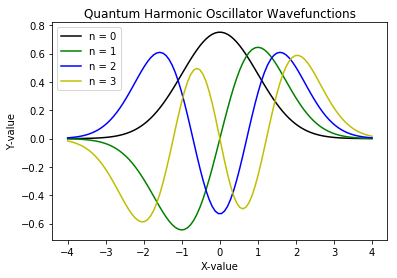

In [68]:
xLabel = "X-value"
yLabel = "Y-value"
title = "Quantum Harmonic Oscillator Wavefunctions"

numberOfDataPoints = 100
nValues = [0, 1, 2, 3]
x1 = -4
x2 =  4

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([len (nValues), numberOfDataPoints])

for i in range (len (nValues)):
    for j in range (len (xValues)):
        yValues[i][j] = quantumWaveFunc (nValues[i], xValues[j])

py.plot (xValues, yValues[0], 'k-', label = "n = 0")
py.plot (xValues, yValues[1], 'g-', label = "n = 1")
py.plot (xValues, yValues[2], 'b-', label = "n = 2")
py.plot (xValues, yValues[3], 'y-', label = "n = 3")
py.xlabel (xLabel)
py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

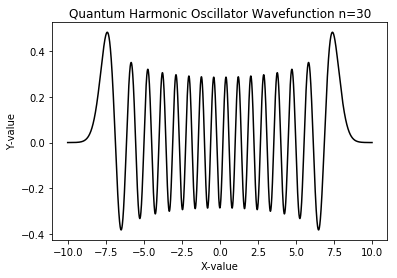

In [69]:
numberOfDataPoints = 10000

title = "Quantum Harmonic Oscillator Wavefunction n=30"

nValue = 30
x1 = -10
x2 =  10

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([numberOfDataPoints])

for j in range (len (xValues)):
    yValues[j] = quantumWaveFunc (nValue, xValues[j])

py.plot (xValues, yValues, 'k-')
py.xlabel (xLabel)
py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

In [75]:
def rootMeanFunc (nValue, xValue):
    return xValue**2 * (abs (quantumWaveFunc (nValue, xValue)))**2

In [76]:

numSamplePoints = 100
x1 = -math.pi / 2
x2 = math.pi / 2
nValue = 5
integral = 0

x, w = gaussxw.gaussxw (numSamplePoints)



xp = 0.5 * (x2 - x1) * x + 0.5 * (x2 + x1)
wp = 0.5 * (x2 - x1) * w



for i in range (numSamplePoints):
    integral += wp[i] * rootMeanFunc (nValue, math.tan (xp[i])) / (math.cos (xp[i]))**2

print (math.sqrt (integral))

2.3452078797796547


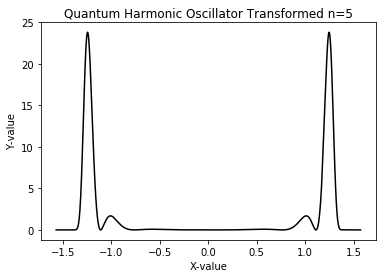

In [116]:
xLabel = "X-value"
yLabel = "Y-value"
title = "Quantum Harmonic Oscillator Transformed n=5"

numberOfDataPoints = 10000
nValue = 5
x1 = -math.pi / 2
x2 =  math.pi / 2

x, w = gaussxw.gaussxw (numberOfDataPoints)

xp = 0.5 * (x2 - x1) * x + 0.5 * (x2 + x1)
wp = 0.5 * (x2 - x1) * w

yValues = []

for xValue in xp:
    yValues.append (rootMeanFunc (nValue, math.tan (xValue)) / (math.cos (xValue))**2)

py.plot (xp, yValues, 'k-')
py.xlabel (xLabel)
py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

This could be problamatic because of the steapness of the curve in regions
$\sqrt{\av{x^2}}$, where

\begin{displaymath}

$\av{x^2} = \int_{-\infty}^\infty x^2 |\psi_n(x)|^2 \>\dd x.$

\end{displaymath}

In [117]:
help (rm.romberg)

Help on function romberg in module romberg:

romberg(f, interval, tolerance, verbose=False, min_order=0, max_order=None, reference=None)
    Evaluate integral by Romberg integration.
    
    Note: The Romberg extrapolation order is taken 0-based in the code
    and diagnostic output.  That is, R(i,0) is the trapezoidal rule
    with 2**i steps.  (In Newman the extrapolation order is taken
    1-based, instead.)
    
    f: function to integrate
    interval: tuple integration region (a,b)
    tolerance: desired absolute error
    verbose (optional):  controls diagnostic output
    min_order (optional): lowest order to carry to, regardless of tolerance
    max_order (optional): limit on order of calculation, giving failure (or None)
    reference (optional): reference value for comparison output (or None)



Write a program that evaluates this integral using Romberg integration and then calculates the uncertainty (i.e., the root-mean-square position of the particle) for a given value of $n$. Use your program to calculate the integral and uncertainty for $n=0$, $1$, ... , $5$. See if you can spot the pattern!


In [137]:
def rombergQuantumWaveFunc (waveFunc, nValue, x1, x2, tolerance):
    integral = 0
    rootMeanSquared = 0
    
    def waveFuncSetN (xValue):
        return waveFunc (nValue, xValue)
    
    def rootMeanSetN (xValue):
        return rootMeanFunc (nValue, xValue)
    
    integral = rm.romberg (waveFuncSetN, (x1, x2), tolerance, verbose=True)
    

    return integral

In [142]:
print (rombergQuantumWaveFunc (quantumWaveFunc, 2, -4, 4, 1e-10))

integrating on range (-4, 4)

R(0,0) +4.418688225193312e-02

R(1,0) -2.102410422928427e+00 epsilon(1,0) -7.1553e-01
R(1,1) -2.817942857988547e+00

R(2,0) +9.614371137893429e-01 epsilon(2,0) +1.0213e+00
R(2,1) +1.982719626028600e+00 epsilon(2,1) +3.2004e-01
R(2,2) +2.302763791629743e+00

R(3,0) +1.325616323613879e+00 epsilon(3,0) +1.2139e-01
R(3,1) +1.447009393555392e+00 epsilon(3,1) -3.5714e-02
R(3,2) +1.411295378057178e+00 epsilon(3,2) -1.4150e-02
R(3,3) +1.397145085778248e+00

R(4,0) +1.327627011515747e+00 epsilon(4,0) +6.7023e-04
R(4,1) +1.328297240816370e+00 epsilon(4,1) -7.9141e-03
R(4,2) +1.320383097300435e+00 epsilon(4,2) -1.4431e-03
R(4,3) +1.318940045224931e+00 epsilon(4,3) -3.0669e-04
R(4,4) +1.318633358791389e+00

R(5,0) +1.328201631672421e+00 epsilon(5,0) +1.9154e-04
R(5,1) +1.328393171724646e+00 epsilon(5,1) +6.3954e-06
R(5,2) +1.328399567118531e+00 epsilon(5,2) +1.2725e-04
R(5,3) +1.328526812671199e+00 epsilon(5,3) +3.7595e-05
R(5,4) +1.328564407837655e+00 epsilon(5,4) +9